<a href="https://colab.research.google.com/github/PeirisLakni/Machine-Learning/blob/main/Assessing%20the%20subscription%20rate%20for%20term%20deposits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting the dataset

### Importing the libraries

In [138]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
from kmodes.kprototypes import KPrototypes

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer
from keras.layers import Embedding
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the data

In [142]:
data = pd.read_csv('/content/drive/MyDrive/ML 02/Assignment 02/Assignment 02-Datasheet.csv')

In [143]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Preprocessing

### Diagnosing missing values

In [144]:
data.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
Target       0
dtype: int64

In [145]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [146]:
data.shape

(45211, 17)

In [147]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [148]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unnon')

3 - marital : marital status (categorical: 'divorced','married','single')

4 - education (categorical: 'secondary','tertiary','primary','unknown')

5 - default: has credit in default? (categorical: 'no','yes')

6 - balance (continous : average yearly balance)

7 - housing: temporary has housing loan? (categorical: 'no','yes')

8 - loan: temporary has personal loan? (categorical: 'no','yes')

9 - contact: contact communication type (categorical: 'cellular','telephone','landline')

10 - day: last contact day

11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - duration: last contact duration, in seconds (numeric). 

13 - campaign: number of contacts performed during this campaign and for this client

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','success')

17 - Target: outcome variable whether customer prefer subscribe for a term deposit.

### Checking for duplicated records

In [149]:
data.duplicated().value_counts()  #no duplicated records

False    45211
dtype: int64

### Constructing new variables

In [150]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [151]:
data['marital']=data['marital'].str.replace('divorced','single')

In [152]:
data['marital'].tail()

45206    married
45207     single
45208    married
45209    married
45210    married
Name: marital, dtype: object

In [153]:
data['marital'].value_counts()

married    27214
single     17997
Name: marital, dtype: int64

In [154]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [155]:
data['job'] = data['job'].str.replace('entrepreneur','self-employed')
data['job'] = data['job'].str.replace('housemaid','unemployed')
data['job'] = data['job'].str.replace('student','unemployed')
data['job'] = data['job'].str.replace('unknown','unemployed')

In [156]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
unemployed       3769
self-employed    3066
retired          2264
Name: job, dtype: int64

In [157]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [158]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [159]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [160]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [161]:
data['contact']=data['contact'].str.replace('unknown','landline')     #assume that unknown party is having a landline connection

In [162]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [163]:
data['day'].tail()

45206    17
45207    17
45208    17
45209    17
45210    17
Name: day, dtype: int64

In [164]:
data['month'].value_counts().sort_values(ascending=False)

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [165]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [166]:
data['poutcome']=data['poutcome'].str.replace('unknown','failure')
data['poutcome']=data['poutcome'].str.replace('other','failure')

In [167]:
data['poutcome'].value_counts()

failure    43700
success     1511
Name: poutcome, dtype: int64

In [168]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

### Identifying unique values

In [169]:
data['education'].unique()
data['job'].unique()

array(['management', 'technician', 'self-employed', 'blue-collar',
       'unemployed', 'retired', 'admin.', 'services'], dtype=object)

### Identifying outliers

<AxesSubplot:xlabel='age', ylabel='Density'>

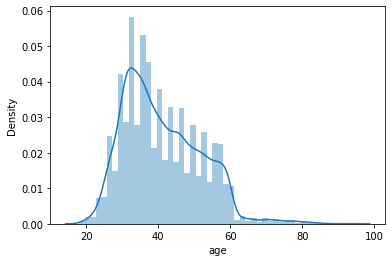

In [170]:
sns.distplot(data['age'])

In [171]:
age_outliers = data['age'].quantile(0.99)
data1 = data[data['age'] < age_outliers]

In [172]:
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='Density'>

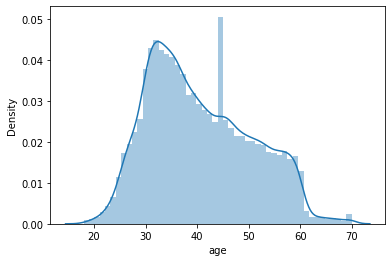

In [173]:
sns.distplot(data1['age'])

<AxesSubplot:xlabel='balance', ylabel='Density'>

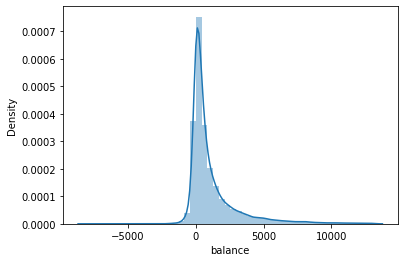

In [174]:
q = data1['balance'].quantile(0.99)
data2 = data1[data1['balance'] < q]
sns.distplot(data2['balance'])

In [175]:
data2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,44275.000000,44275.000000,44275.000000,44275.000000,44275.000000,44275.000000,44275.000000
mean,40.511824,1140.887883,15.810435,257.335562,2.770525,40.104529,0.574365
std,9.962885,1905.363386,8.328118,257.436811,3.108365,100.325713,2.306357
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,68.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,431.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1358.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,70.000000,13099.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='duration', ylabel='Density'>

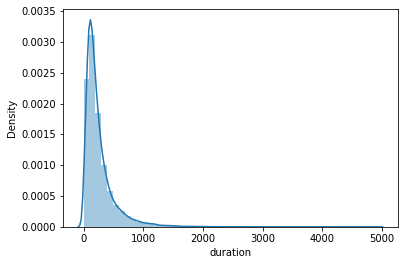

In [176]:
sns.distplot(data2['duration'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

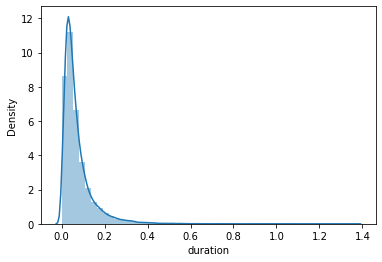

In [209]:
# 5000/60   #sec to mins
data2['duration'] = data2['duration']*(1/60)
sns.distplot(data2['duration'])

In [210]:
a = data2['duration_mins'].quantile(0.99)
data3 = data2[data2['duration_mins'] < a]

<AxesSubplot:xlabel='duration_mins', ylabel='Density'>

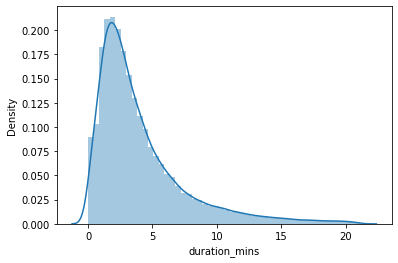

In [211]:
sns.distplot(data3['duration_mins'])

<AxesSubplot:xlabel='pdays', ylabel='Density'>

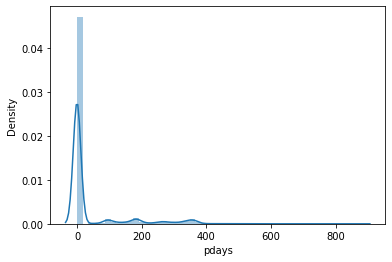

In [212]:
sns.distplot(data3['pdays'])

In [213]:
#remove prev campaign failure ones and who have not contacted from past 1.5 years
cond1 = data3['pdays'] > 600
cond2 = data3['previous'] == 'failure'

final = data3[~(cond1 & cond2)]
final.shape

(43832, 18)

<AxesSubplot:xlabel='pdays', ylabel='Density'>

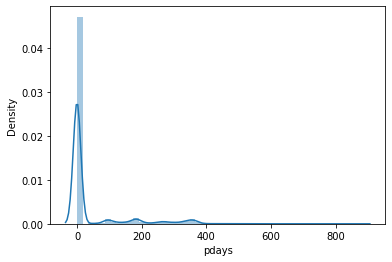

In [214]:
sns.distplot(final['pdays'])

<AxesSubplot:xlabel='pdays', ylabel='Density'>

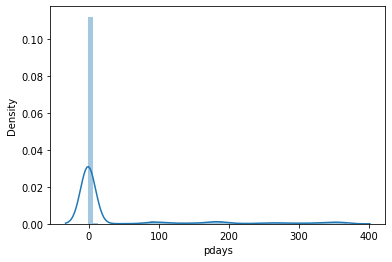

In [215]:
d = final['pdays'].quantile(0.99)
final_data = final[final['pdays'] < d]
sns.distplot(final_data['pdays'])

In [216]:
final_data.shape

(43366, 18)

In [217]:
final_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'duration_mins'],
      dtype='object')

# Exploratory Data Analysis


### Univariate Analysis 

### Bivariate Analysis

<AxesSubplot:xlabel='campaign', ylabel='previous'>

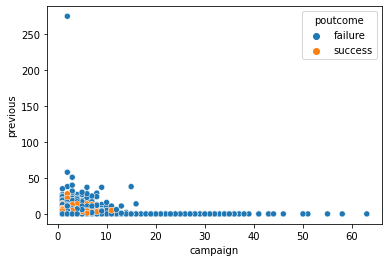

In [218]:
sns.scatterplot(x='campaign', y='previous',hue = 'poutcome', data=final_data)

<AxesSubplot:xlabel='job', ylabel='campaign'>

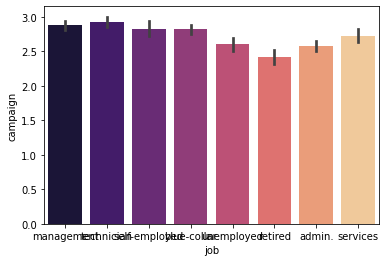

In [219]:
sns.barplot(x = 'job' , y = 'campaign',data = final_data,palette = 'magma')

<AxesSubplot:xlabel='marital', ylabel='campaign'>

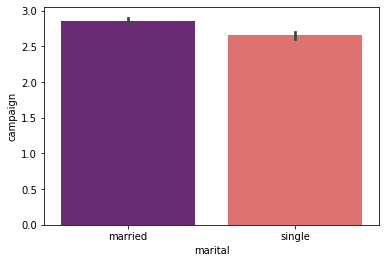

In [220]:
sns.barplot(x = 'marital' , y = 'campaign',data = final_data,palette = 'magma')

<AxesSubplot:xlabel='job', ylabel='previous'>

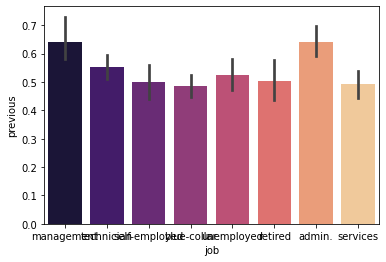

In [221]:
sns.barplot(x = 'job' , y = 'previous',data = final_data,palette = 'magma')

In [222]:
final_data.dtypes

age                int64
job               object
marital           object
education         object
default           object
balance            int64
housing           object
loan              object
contact           object
day                int64
month             object
duration         float64
campaign           int64
pdays              int64
previous           int64
poutcome          object
Target            object
duration_mins    float64
dtype: object

<AxesSubplot:xlabel='education', ylabel='previous'>

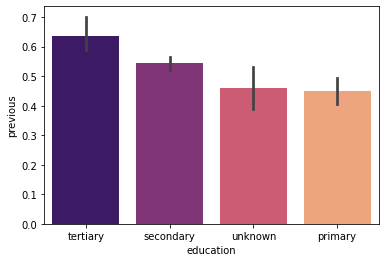

In [223]:
sns.barplot(x = 'education' , y = 'previous',data = final_data,palette = 'magma')

### Decriptive data analysis

In [224]:
final_data.describe()

,age,balance,day,duration,campaign,pdays,previous,duration_mins
count,43366.000000,43366.000000,43366.000000,43366.000000,43366.000000,43366.000000,43366.000000,43366.000000
mean,40.513305,1138.052322,15.828737,0.067520,2.778467,35.761126,0.553014,4.051171
std,9.961686,1904.471377,8.343760,0.058937,3.125747,90.486931,2.277911,3.536211
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,66.000000,8.000000,0.028333,1.000000,-1.000000,0.000000,1.700000
50%,39.000000,429.000000,16.000000,0.049167,2.000000,-1.000000,0.000000,2.950000
75%,48.000000,1356.000000,21.000000,0.086389,3.000000,-1.000000,0.000000,5.183333
max,70.000000,13099.000000,31.000000,0.352500,63.000000,369.000000,275.000000,21.150000


In [225]:
final_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,duration_mins
0,58,management,married,tertiary,no,2143,yes,no,landline,5,may,0.072500,1,-1,0,failure,no,4.350000
1,44,technician,single,secondary,no,29,yes,no,landline,5,may,0.041944,1,-1,0,failure,no,2.516667
2,33,self-employed,married,secondary,no,2,yes,yes,landline,5,may,0.021111,1,-1,0,failure,no,1.266667
3,47,blue-collar,married,unknown,no,1506,yes,no,landline,5,may,0.025556,1,-1,0,failure,no,1.533333
4,33,unemployed,single,unknown,no,1,no,no,landline,5,may,0.055000,1,-1,0,failure,no,3.300000


In [226]:
correlation = final_data.corr()

<AxesSubplot:>

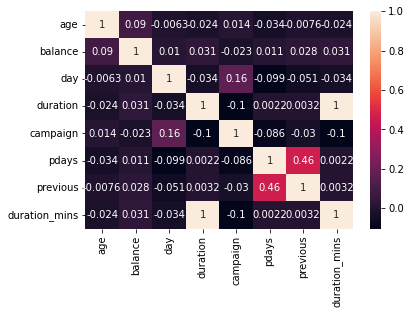

In [227]:
sns.heatmap(correlation , xticklabels = correlation.columns , yticklabels = correlation.columns , annot = True)

# Converting catogical variables into numerical variables

In [228]:
final_data.dtypes

age                int64
job               object
marital           object
education         object
default           object
balance            int64
housing           object
loan              object
contact           object
day                int64
month             object
duration         float64
campaign           int64
pdays              int64
previous           int64
poutcome          object
Target            object
duration_mins    float64
dtype: object

In [229]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [230]:

final_data['job'] = le.fit_transform(final_data['job'])
final_data['marital'] = le.fit_transform(final_data['marital'])
final_data['education'] = le.fit_transform(final_data['education'])
final_data['default'] = le.fit_transform(final_data['default'])
final_data['housing'] = le.fit_transform(final_data['housing'])
final_data['loan'] = le.fit_transform(final_data['loan'])
final_data['contact'] = le.fit_transform(final_data['contact'])
final_data['poutcome'] = le.fit_transform(final_data['poutcome'])
final_data['Target'] = le.fit_transform(final_data['Target'])

In [231]:
final_data['month'].value_counts()

may    13379
jul     6688
aug     5999
jun     5169
nov     3777
apr     2794
feb     2519
jan     1358
oct      619
sep      450
mar      430
dec      184
Name: month, dtype: int64

In [232]:
final_data['month'] = final_data['month'].replace('jan',1)
final_data['month'] = final_data['month'].replace('feb',2)
final_data['month'] = final_data['month'].replace('mar',3)
final_data['month'] = final_data['month'].replace('apr',4)
final_data['month'] = final_data['month'].replace('may',5)
final_data['month'] = final_data['month'].replace('jun',6)
final_data['month'] = final_data['month'].replace('jul',7)
final_data['month'] = final_data['month'].replace('aug',8)
final_data['month'] = final_data['month'].replace('sep',9)
final_data['month'] = final_data['month'].replace('oct',10)
final_data['month'] = final_data['month'].replace('nov',11)
final_data['month'] = final_data['month'].replace('dec',12)

In [233]:
final_data['month'].value_counts()

5     13379
7      6688
8      5999
6      5169
11     3777
4      2794
2      2519
1      1358
10      619
9       450
3       430
12      184
Name: month, dtype: int64

In [234]:
final_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,duration_mins
0,58,2,0,2,0,2143,1,0,1,5,5,0.072500,1,-1,0,0,0,4.350000
1,44,6,1,1,0,29,1,0,1,5,5,0.041944,1,-1,0,0,0,2.516667
2,33,4,0,1,0,2,1,1,1,5,5,0.021111,1,-1,0,0,0,1.266667
3,47,1,0,3,0,1506,1,0,1,5,5,0.025556,1,-1,0,0,0,1.533333
4,33,7,1,3,0,1,0,0,1,5,5,0.055000,1,-1,0,0,0,3.300000


# Data Preparation

In [235]:
final_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'duration_mins'],
      dtype='object')

In [238]:
final_data = final_data.drop('duration_mins', axis=1)

In [241]:
final_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [242]:
x = final_data.iloc[:,:15]
y = final_data.iloc[:,16]

print(x.shape)
print(y.shape)


(43366, 15)
(43366,)


In [243]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,2,0,2,0,2143,1,0,1,5,5,0.072500,1,-1,0
1,44,6,1,1,0,29,1,0,1,5,5,0.041944,1,-1,0
2,33,4,0,1,0,2,1,1,1,5,5,0.021111,1,-1,0
3,47,1,0,3,0,1506,1,0,1,5,5,0.025556,1,-1,0
4,33,7,1,3,0,1,0,0,1,5,5,0.055000,1,-1,0


In [244]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [245]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 365)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32524, 15)
(10842, 15)
(32524,)
(10842,)


In [246]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 365)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32524, 15)
(10842, 15)
(32524,)
(10842,)


# Modeling

### Model 01: Logistic Regression

In [247]:
from pyparsing import results
from math import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

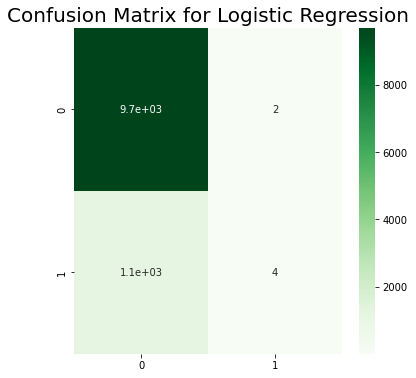

Training Accuracy:  0.8943856844176608
Testdata Accuracy:  0.894668880280391

Classification Report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      9698
           1       0.67      0.00      0.01      1144

    accuracy                           0.89     10842
   macro avg       0.78      0.50      0.48     10842
weighted avg       0.87      0.89      0.85     10842


Area Under Curve :
 0.501645137704119


In [256]:
LR = LogisticRegression()

LR.fit(x_train,y_train)

y_pred = LR.predict(x_test)

from sklearn.metrics import confusion_matrix
conf_matrix =confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize'] = (6,6)
sns.heatmap(conf_matrix,annot = True,cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression',fontweight = 30,fontsize = 20)
plt.show()

print("Training Accuracy: ",model.score(x_train,y_train))
print("Testdata Accuracy: ",model.score(x_test,y_test))

CR_RF = classification_report(y_test,y_pred)
fprRF,recallRF,thresholdsRF = roc_curve(y_test,y_pred)
AUC_RF = auc(fprRF,recallRF)

resultsRF = {"\nClassification Report":CR_RF,"\nArea Under Curve":AUC_RF}

for measure in resultsRF:
  print(measure,":\n",resultsRF[measure])

In [249]:
!pip install slicer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [250]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.2 MB/s eta 0:00:00


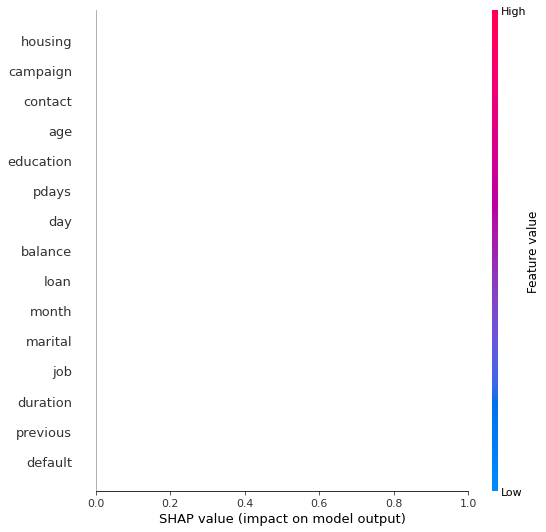

In [269]:
import shap

#computing shap values
explainer = shap.LinearExplainer(LR,x_train)
shap_values = explainer.shap_values(x_test)

#generate summary plot
shap.summary_plot(shap_values,x_test,plot_type='hbar',class_names=LR.classes_)